## Amazon Sales Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [122]:
df = pd.read_csv("AmazonSaleReport.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [123]:
df.shape

(128976, 21)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

### Cleaning Data

In [125]:
# removing unwanted columns
df.drop(["New", "PendingS", "index"], axis=1, inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [127]:
# checking for null values
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

Since, there are so much null values in **currency** and in **Amount** as well as some null values are also present in other columns.
We can replace those null values with the mean of that column or we can simply remove the rows.

In [128]:
df.shape

(128976, 18)

In [129]:
# mean_of_amount = round(df["Amount"].mean(), 2)

In [130]:
# removing all null values
df = df.dropna()

In [131]:
df.shape

(37514, 18)

In [132]:
# type conversion of postal code from object to int
df['ship-postal-code'] = df['ship-postal-code'].astype(int)

In [133]:
# changing datatype of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            37514 non-null  object        
 1   Date                37514 non-null  datetime64[ns]
 2   Status              37514 non-null  object        
 3   Fulfilment          37514 non-null  object        
 4   Sales Channel       37514 non-null  object        
 5   ship-service-level  37514 non-null  object        
 6   Category            37514 non-null  object        
 7   Size                37514 non-null  object        
 8   Courier Status      37514 non-null  object        
 9   Qty                 37514 non-null  int64         
 10  currency            37514 non-null  object        
 11  Amount              37514 non-null  float64       
 12  ship-city           37514 non-null  object        
 13  ship-state          37514 non-null  object        

In [135]:
df.describe(include=object)

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [136]:
df[['Qty', 'Amount']].describe()

,Qty,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


## EDA

In [137]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

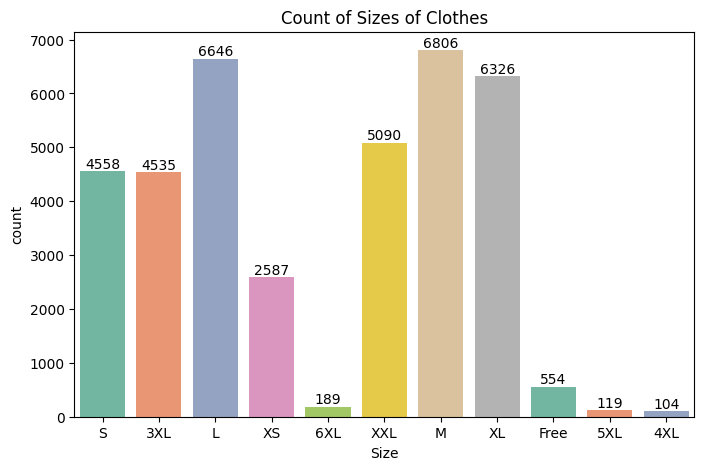

In [138]:
# lets plot the countplot for size column
plt.figure(figsize= (8, 5))
plt.title("Count of Sizes of Clothes")
# count of each bar
ax = sns.countplot(x='Size', data=df, palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph we can see most of the users are puchased **M** size of clothes

Text(0.5, 0, 'Courier')

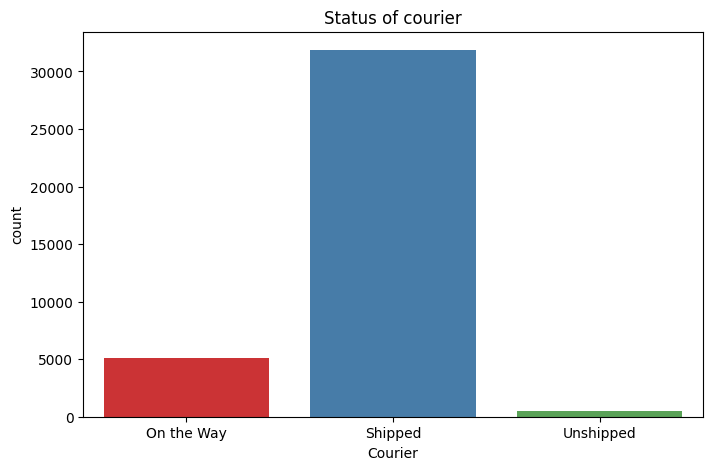

In [139]:
# lets check the couries status
plt.figure(figsize= (8,5))
plt.title("Status of courier")
sns.countplot(data=df, x= 'Courier Status', palette="Set1")
plt.xlabel("Courier")

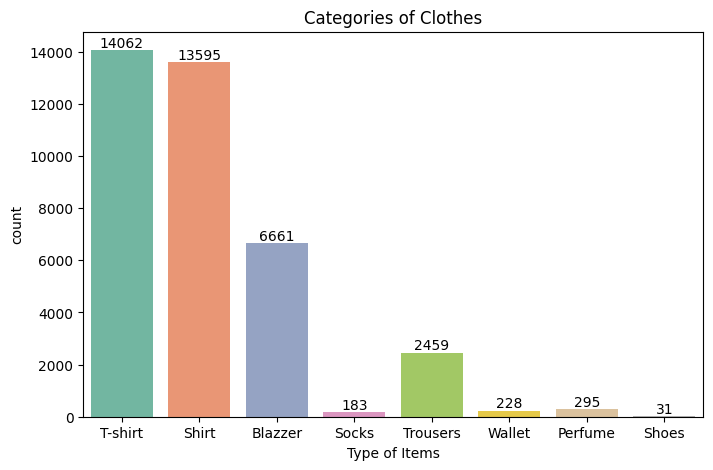

In [140]:
# lets check the categories of clothesouries status
plt.figure(figsize= (8,5))
plt.title("Categories of Clothes")
# sns.countplot(data=df, x= 'Category', palette="Set2")
ax = sns.countplot(x='Category', data=df, palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Type of Items")
plt.show()

From the figure above it is conclusive that most of the buyers purchased **T-shirt**

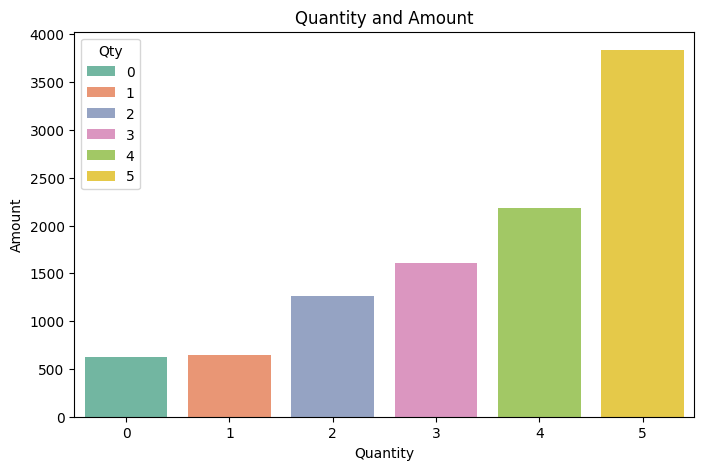

In [141]:
# Relation of Quantity and Amount
plt.figure(figsize=(8,5))
plt.title('Quantity and Amount')
sns.barplot(data=df, x='Qty', y='Amount', hue='Qty', palette='Set2', ci=None)
plt.xlabel('Quantity')
plt.show()

From the above figure we can say that the maximum quantity of any item is 5

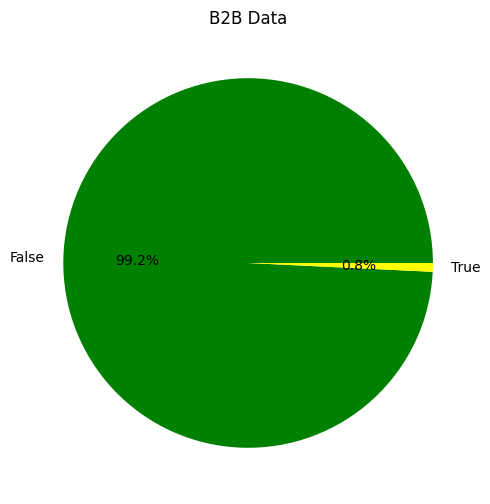

In [142]:
# lets check B2B data
b2b_data = df['B2B'].value_counts()

# plotting the pie chart
plt.figure(figsize=(6, 6))
plt.title("B2B Data")
plt.pie(b2b_data, labels=b2b_data.index, autopct='%1.1f%%', colors=['green', 'yellow'])
plt.show()

Above figure states that most of the buyers are retailers i.e. **99.2%** and **0.8%** are B2B buyers.

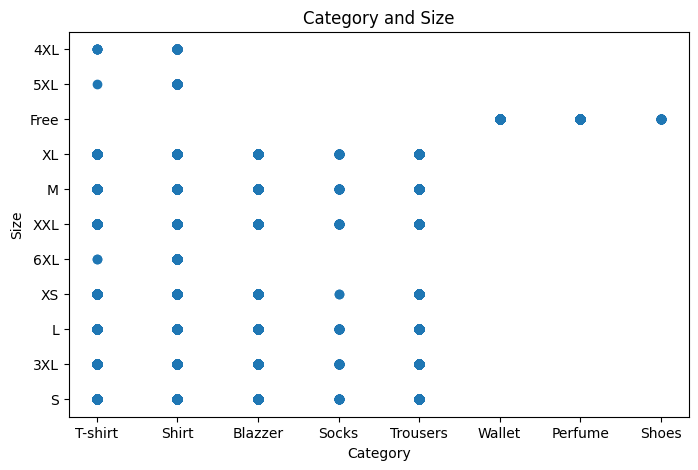

In [143]:
# lets plot category and size 
plt.figure(figsize=(8,5))
plt.title("Category and Size")
plt.scatter(df['Category'], df['Size'], )
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

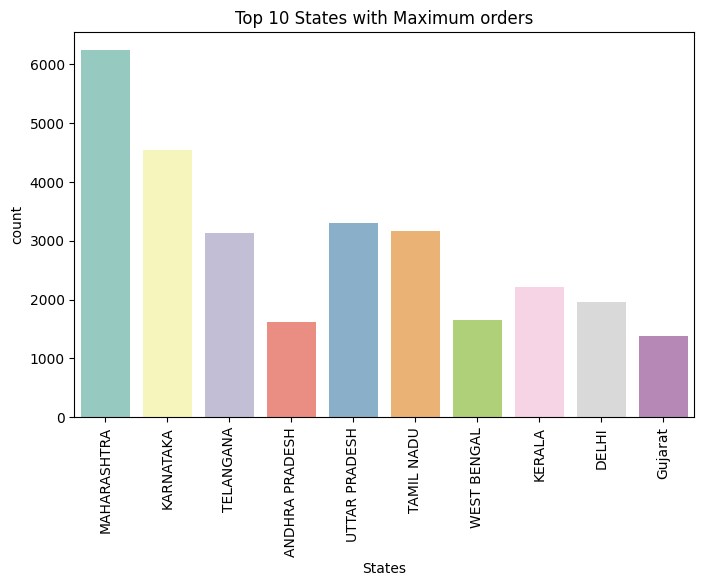

In [144]:
# lets plot the top 10 state with maximum orders
top_ten_states = df['ship-state'].value_counts().head(10)
plt.figure(figsize=(8, 5))
plt.title('Top 10 States with Maximum orders')
sns.countplot(data=df[df['ship-state'].isin(top_ten_states.index)], x='ship-state', palette='Set3')
plt.xlabel("States")
plt.xticks(rotation=90)
plt.show()

From the above plot it is conclusive that most of the buyers are from **Maharashtra**